# Background

Diversifying sales channels for customers to access their grocery needs is crucial for supermarkets to facilitate shoppers. However, some people still prefer to physically visit the supermarket to purchase their groceries. Additionally, like any other retail business, promotions are a vital aspect that management can leverage to boost the company's sales.

A supermarket in the United States aims to increase its sales figures by analyzing various types of customer data they possess. In addition to that, they also intend to conduct an analysis of the campaigns they have implemented and perform an analysis of selling channels.



# Problem Statement

This supermarket needs to identify the customer lifetime value and conduct customer behavior analysis to make their promotions and selling channels more targeted, thereby reducing operational costs and increasing sales effectiveness. The supermarket management aims to understand:
- The most potential target market for the supermarket.
- The products most favored by customers for spending.
- The most effective campaigns that have been executed over the past 2 years, along with recommendations for the next campaign.
- The selling channels that are effective for the supermarket's profit.


# Data Understanding

To address the formulated problem statement, a data understanding process is conducted on the available supermarket customer data to gain insights and make adjustments through data cleaning for irrelevant information in the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import datetime
import missingno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from statistics import mean

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
pd.set_option('display.max_columns', None)
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


## Supermarket Customers Data Dictionary:
#### People
- ID                : Customer's unique identifier
- Year_Birth        : Customer's birth year
- Education         : Customer's education level
- Martial_Status    : Customer's martial status
- Income            : Customer's yearly houshold income
- Kidhome           : Number of children in customer's household
- Teenhome          : Number of teenagers in customer's household
- Dt_Customer       : Date of customer's enrollment with the company
- Recency           : Number of days since customer's last purchase
- Complain          : 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- MntWines          : Amount spent on wine in last 2 years
- MntFruits         : Amount spent on fruits in last 2 years
- MntMeatProducts   : Amount spent on meat in last 2 years
- MntFishProducts   : Amount spent on fish in last 2 years
- MntSweetProducts  : Amount spent on sweets in last 2 years
- MntGoldProds      : Amount spent on gold in last 2 years

#### Promotion
- NumDealsPurchases : Number of purchases made with a discount
- AcceptedCmp1      : 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2      : 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3      : 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4      : 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5      : 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response          : 1 if the customer accepted the offer in the last campaign, 0 otherwise

#### Place
- NumWebPurchases       : Number of purchases made through the company's website
- NumCatalogPurchases   : Number of purchases made using a catalog
- NumStorePurchases     : Number of purchases made directly in stores
- NumWebVisitsMonth     : Number of visits to the company's website in the last month

In [3]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].sample(1).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2240, 29)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2240,[6295]
1,Year_Birth,int64,0,59,[1968]
2,Education,object,0,5,[Master]
3,Marital_Status,object,0,8,[Married]
4,Income,float64,24,1974,[27116.0]
5,Kidhome,int64,0,3,[1]
6,Teenhome,int64,0,3,[0]
7,Dt_Customer,object,0,663,[18-09-2012]
8,Recency,int64,0,100,[53]
9,MntWines,int64,0,776,[47]


In [4]:
pd.set_option('display.max_columns', None)
display(df.describe(include='object'))

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   0 non-null      int64  
 1   Year_Birth           0 non-null      int64  
 2   Education            0 non-null      object 
 3   Marital_Status       0 non-null      object 
 4   Income               0 non-null      float64
 5   Kidhome              0 non-null      int64  
 6   Teenhome             0 non-null      int64  
 7   Dt_Customer          0 non-null      object 
 8   Recency              0 non-null      int64  
 9   MntWines             0 non-null      int64  
 10  MntFruits            0 non-null      int64  
 11  MntMeatProducts      0 non-null      int64  
 12  MntFishProducts      0 non-null      int64  
 13  MntSweetProducts     0 non-null      int64  
 14  MntGoldProds         0 non-null      int64  
 15  NumDealsPurchases    0 non-null      int64  
 16  NumWebP

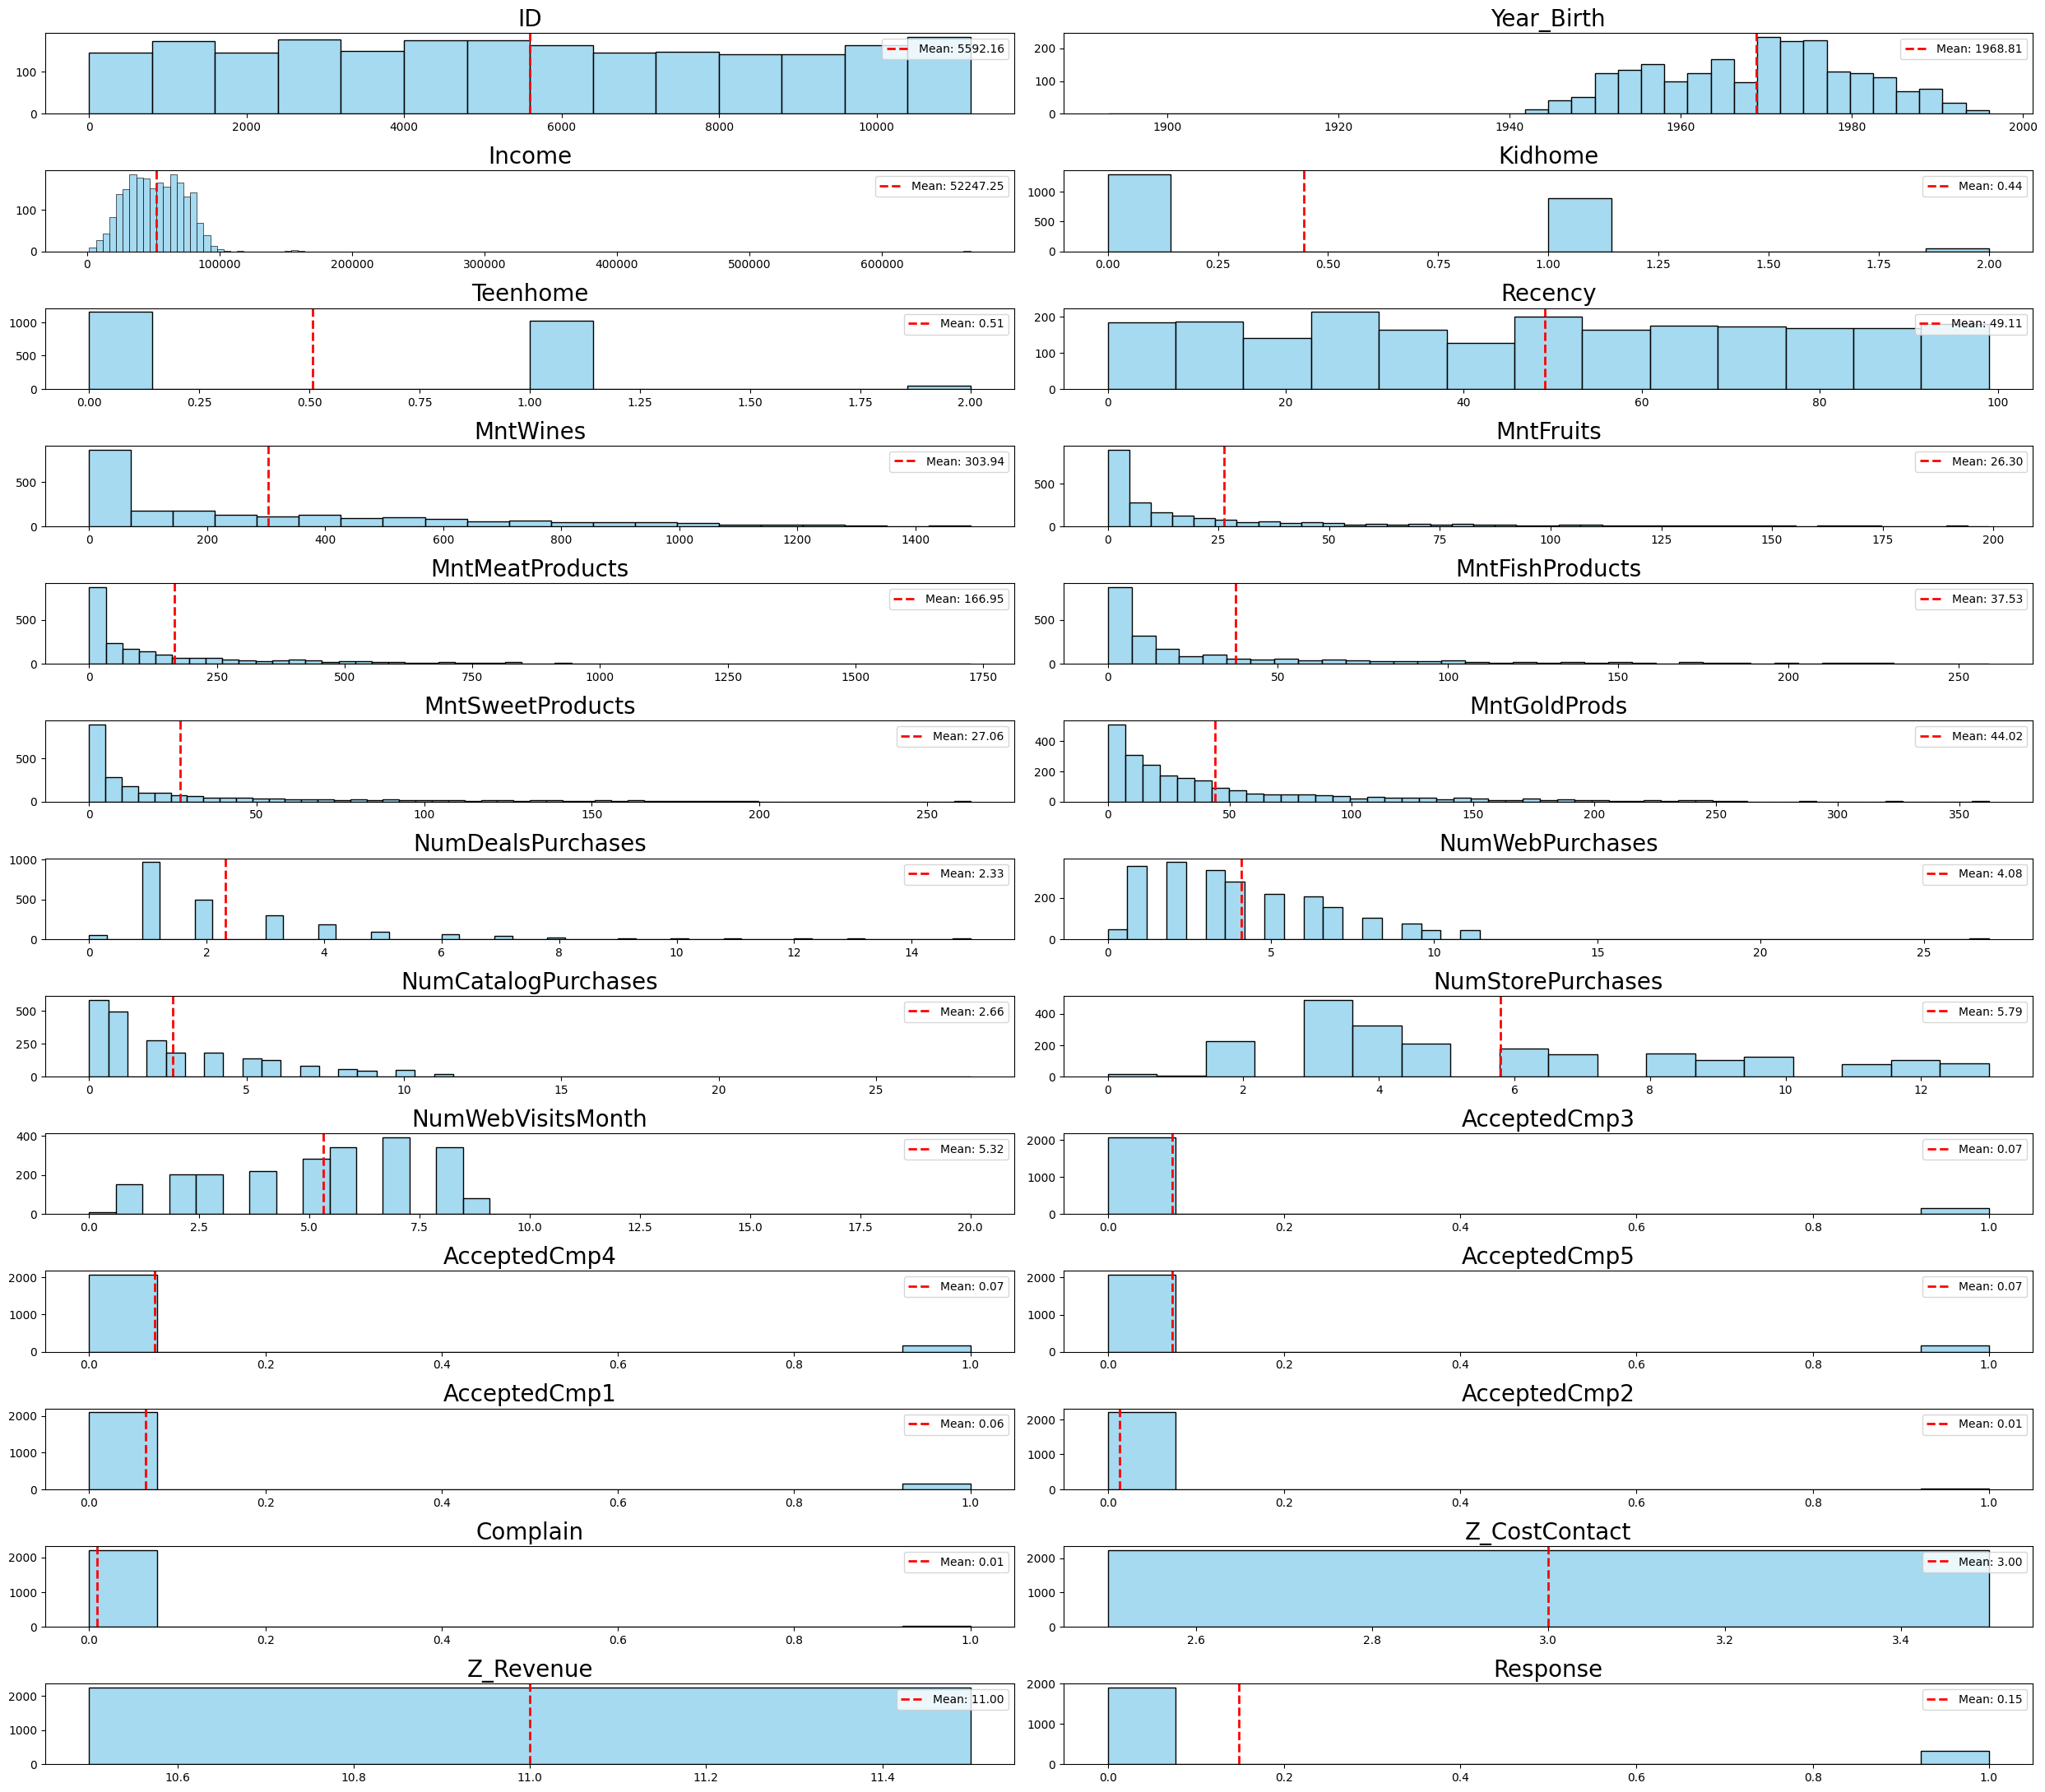

In [6]:
plt.figure(figsize=(25, 25))
plotnumber = 1
num_features = df.select_dtypes(include='number').columns

for feature in num_features:
    ax = plt.subplot(15, 2, plotnumber)
    
    # Gunakan palet warna yang berbeda untuk setiap plot
    sns.histplot(data=df, x=feature, color='skyblue')
    
    # Tambahkan garis rata-rata atau nilai lain yang relevan
    mean_val = df[feature].mean()
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    plt.title(feature, fontsize=20)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    
    plotnumber += 1

plt.tight_layout()
plt.show()

While numerous numerical features exhibit non-normal distributions, special attention is required for specific ones. Both income and year of birth stand out, suggesting the presence of outliers that necessitate handling. Conversely, the remaining features, characterized as discrete numerical data, do not indicate a need for intervention.

## From the data understanding of the Supermarket Customers dataset, it can be concluded that:
- The Supermarket data consists of 2240 rows and 29 columns.
- Out of these 29 columns, they are categorized into people details, product information, success in attracting customers from various marketing options in the last 2 years, and sales channels.
- Income is assumed to be in USD.
- Kid age is assumed to be in the range of 0-10, and teenagers age is assumed to be in the range of 10-19 (source: https://data.unicef.org/topic/adolescents/overview/)

Data Cleaning:
- The Income column has 24 missing values that need to be handled.
- The Dt_Customer column needs to be converted from object type to date type.
- No duplicates are found, so the ID column represents unique customers.
- The Z_CostContact and Z_Revenue columns are unclear in the provided dictionary and can be deleted.
- There are outliers in the Age and Income columns that need to be addressed.

Feature Engineering:
- The Marital_Status column needs to be transformed into 5 categories (single, together, married, divorced, and other).
- The Education column needs to be transformed into 3 categories (Low Education, Middle Education, and High Education).
- Change the Year_Birth column to Age for easier analysis.
- Create an Enrollment_Age column indicating how long the customer has been subscribed to the supermarket for easier analysis.

# Data Cleaning & Feature Engineering
To solve the problem statement above, data cleaning & feature engineering are done to adjust the data needed for analysis.

## Feature Engineering

Dt_Customer shows the initial date of customer subscribing to the supermarket. Thus, the type of the data changed to datetime.

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df['Dt_Customer'].dtypes)

datetime64[ns]


Simplify Marital_Status columns into 5 categories (Single, Together, Married, Divorced, Other). Include Absurd dan YOLO as Other category.

In [8]:
df['Marital_Status'] = df['Marital_Status'].map({
    'Single': 'Single',
    'Together': 'Together',
    'Married': 'Married',
    'Divorced': 'Divorced',
    'Widow': 'Divorced',
    'Alone': 'Single',     
    'Absurd': 'Other', 
    'YOLO': 'Other'
})

print(df['Marital_Status'].unique())


['Single' 'Together' 'Married' 'Divorced' 'Other']


Simplify Education column into 3 categories (Low Education for Basic, Mid Education for 2n Cycle; Graduation; Master, and High Education for PhD)

In [9]:
df['Education'] = df['Education'].map({
    'Basic': 'Low Education',
    '2n Cycle': 'Mid Education',
    'Graduation': 'Mid Education',
    'Master': 'Mid Education',
    'PhD': 'High Education'
})

print(df['Education'].unique())

['Mid Education' 'High Education' 'Low Education']


Replacing Year_Birth column into Age to make it easier for analysis.

In [10]:
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

df.drop('Year_Birth', axis=1, inplace=True)

display(df['Age'].describe())

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

Adding Enrollment_Age columns based on Dt_Customer column

In [11]:
current_year = datetime.now().year
df['Enrollment_Age'] = current_year - df['Dt_Customer'].dt.year

display(df['Enrollment_Age'].describe())

count    2240.000000
mean       10.971875
std         0.684554
min        10.000000
25%        11.000000
50%        11.000000
75%        11.000000
max        12.000000
Name: Enrollment_Age, dtype: float64

Deletion of Z_CostContact and Z_Revenue columns

In [12]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

Rename columns acceptedcmp1 through acceptedcmp5 and Response to Campaign 1 through Campaign 5 and Campaign 6, respectively.

In [13]:
column_mapping = {
    'AcceptedCmp1': 'Campaign 1',
    'AcceptedCmp2': 'Campaign 2',
    'AcceptedCmp3': 'Campaign 3',
    'AcceptedCmp4': 'Campaign 4',
    'AcceptedCmp5': 'Campaign 5',
    'Response': 'Campaign 6'
}

df.rename(columns=column_mapping, inplace=True)


## Data Duplicates Handling

Check duplicates on the dataest of supermarket customer

In [14]:
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   0 non-null      int64         
 1   Education            0 non-null      object        
 2   Marital_Status       0 non-null      object        
 3   Income               0 non-null      float64       
 4   Kidhome              0 non-null      int64         
 5   Teenhome             0 non-null      int64         
 6   Dt_Customer          0 non-null      datetime64[ns]
 7   Recency              0 non-null      int64         
 8   MntWines             0 non-null      int64         
 9   MntFruits            0 non-null      int64         
 10  MntMeatProducts      0 non-null      int64         
 11  MntFishProducts      0 non-null      int64         
 12  MntSweetProducts     0 non-null      int64         
 13  MntGoldProds         0 non-null      int64         


As there are no duplicates within the datasets. No further action needed.

## Handling Missing Values

<Axes: >

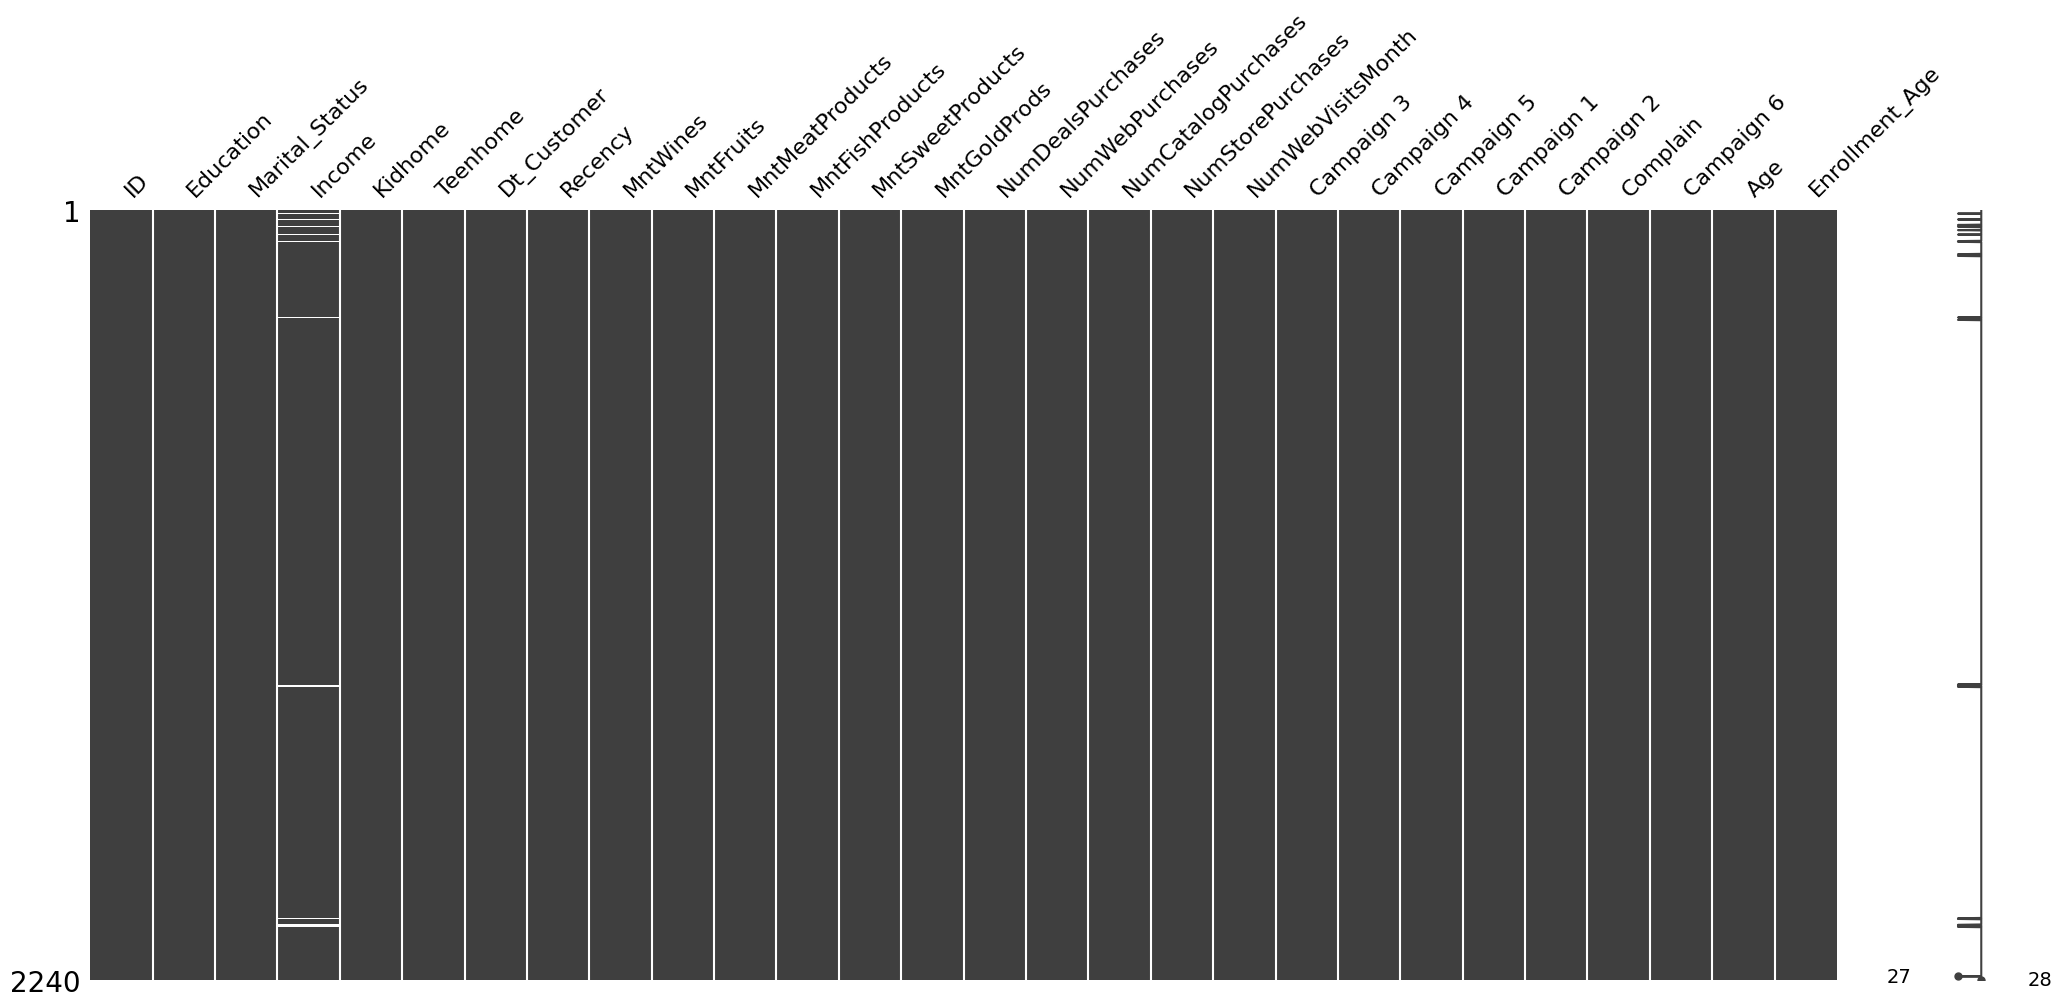

In [15]:
missingno.matrix(df)

As seen from chart above, there are missing values from Income column.

Thus, there is handling needed on Income column.

In [16]:
print(df.isna().sum())

ID                      0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Campaign 3              0
Campaign 4              0
Campaign 5              0
Campaign 1              0
Campaign 2              0
Complain                0
Campaign 6              0
Age                     0
Enrollment_Age          0
dtype: int64


There are 24 rows of missing value from column Income in df. Now, let's look at the percentage of the missing value based on the whole data.

In [17]:
# empty data percentage of Income column

df['Income'].isna().sum()/df.shape[0]*100

1.0714285714285714

Rule of thumb: if missing value is below 5%, then the data is dropped. Moreover, the missing values in the "income" column are of the MCAR type, where customers intentionally or unintentionally did not provide income data during subscription with the supermarket. Only a small proportion, specifically 1.07% of the entire dataset, has missing values. Therefore, for handling these missing values, they can be dropped.

In [18]:
df.dropna(subset='Income', inplace=True)
df.reset_index(drop=True, inplace=True)

## Handling outliers

In the process of comprehending the data, it was identified that intervention is required for the Income and Age features. To begin, the outliers in the Income column will be addressed.

In [19]:
iqr_upper_income = df['Income'].quantile(0.75)
iqr_lower_income = df['Income'].quantile(0.25)
iqr = iqr_upper_income - iqr_lower_income

upper_income = iqr_upper_income + (iqr * 1.5)
lower_income = iqr_lower_income - (iqr * 1.5)

outliers_income = df[(df['Income'] < lower_income) | (df['Income'] > upper_income)]
outliers_income['Income'].count()

8

There are 8 data entry of outliers in Income column.

<Axes: xlabel='Income'>

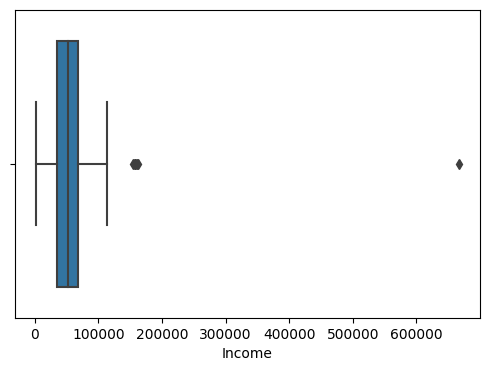

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(df, x='Income')

The outlier on income column could be seen on chart above. There are 8 outliers from Income column. The outlier data in the income column could be dropped.

In [21]:
df.drop(outliers_income.index, inplace=True)
df = df.reset_index(drop=True)

Next, outliers on Age column will be handled

In [22]:
iqr_upper_age = df['Age'].quantile(0.75)
iqr_lower_age = df['Age'].quantile(0.25)
iqr = iqr_upper_age - iqr_lower_age

upper_age = iqr_upper_age + (iqr * 1.5)
lower_age = iqr_lower_age - (iqr * 1.5)

outliers_age = df[(df['Age'] < lower_age) | (df['Age'] > upper_age)]
outliers_age['Age'].count()

3

There are 3 data of Age feature that needs to be handled

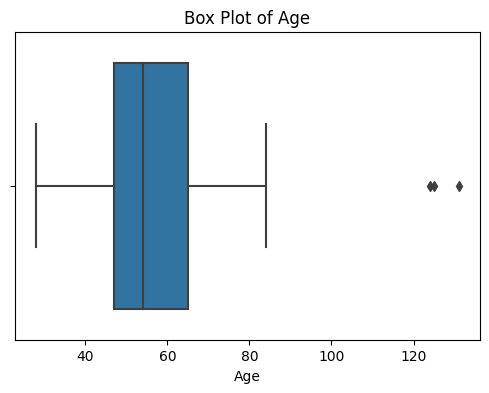

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(df, x='Age')
plt.title('Box Plot of Age')
plt.show()

In [24]:
len(outliers_age)/df.shape[0]*100

0.1358695652173913

The median age of the population in the US is 38.9 (source: https://www.census.gov/newsroom/press-releases/2023/population-estimates-characteristics.html#:~:text=JUNE%2022%2C%202023%20%E2%80%94%20The%20nation's,of%20the%20population%20is%20younger.). There are outliers in the "Age" data where ages above 120 are considered unrealistic. Additionally, the proportion of outliers in the "Age" data from the entire dataset is 0.25%. Therefore, it is reasonable to drop the outliers in the "Age" data.

In [25]:
df.drop(outliers_age.index, inplace=True)
df = df.reset_index(drop=True)

Let's look at the dataframe that has been cleaned.

In [26]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2205, 28)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2205,"[199, 2807]"
1,Education,object,0,3,"[High Education, Low Education]"
2,Marital_Status,object,0,5,"[Divorced, Single]"
3,Income,float64,0,1963,"[76624.0, 80739.0]"
4,Kidhome,int64,0,3,"[1, 2]"
5,Teenhome,int64,0,3,"[0, 2]"
6,Dt_Customer,datetime64[ns],0,662,"[2013-07-29T00:00:00.000000000, 2013-11-30T00:..."
7,Recency,int64,0,100,"[45, 3]"
8,MntWines,int64,0,775,"[377, 84]"
9,MntFruits,int64,0,158,"[68, 159]"


# Exploratory Data Analysis (EDA)

After completing the data cleaning process, we can proceed to the analysis phase. The analysis is based on education level, income level, and age range. This analysis is conducted with the aim of facilitating the identification of target customers and creating effective marketing content for customers classified within these parameters.

# Customer Demographic Analysis

First, we need to understand the demographics of customers at Supermarket X to ensure that the analysis is more targeted. From the available data, the demographics to be analyzed are based on education level, income level, and age.

Education Level of Customer Analysis

Let's take a look at the education level composition in the customer data of supermarket X.

In [27]:
education_counts = df['Education'].value_counts()
print("Frequency of Education Levels:")
print(education_counts)

education_summary = df['Education'].describe()
print("\nSummary Statistics for Education:")
print(education_summary)

education_percentage = (education_counts / len(df)) * 100
print("\nPercentage of Education Levels:")
print(education_percentage)

Frequency of Education Levels:
Education
Mid Education     1675
High Education     476
Low Education       54
Name: count, dtype: int64

Summary Statistics for Education:
count              2205
unique                3
top       Mid Education
freq               1675
Name: Education, dtype: object

Percentage of Education Levels:
Education
Mid Education     75.963719
High Education    21.587302
Low Education      2.448980
Name: count, dtype: float64


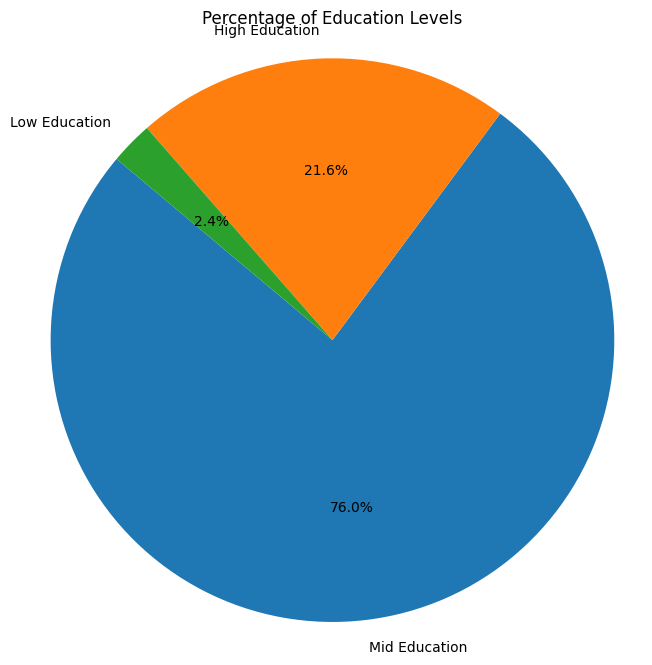

<Figure size 640x480 with 0 Axes>

In [28]:
education_levels = education_percentage.index
education_percentages = education_percentage.values
plt.figure(figsize=(8, 8))
plt.pie(education_percentages, labels=education_levels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Education Levels')
plt.axis('equal')
plt.show()
plt.savefig('education_pie_chart.png')

It can be observed that the education level composition of supermarket customers shows a Mid-Education mix of 75.8%, followed by High-Education at 21.79%, and the lowest being Low-Education with a composition of 2.38%.

However, due to the majority of customers having Mid-Education and High-Education backgrounds, the analysis will be focused on customers with Mid-Education and High-Education levels. Therefore, Low-Education customers can be disregarded to concentrate the analysis.

## Income Level of Customer Analysis

According to Frankenfield (2023), the classification of middle-income in the USA is as follows:

- Single households (without a partner and children) fall into the middle-income class with an annual income ranging from 30,000 to 90,000 USD.
- Couples, households with two people (assumed to be either living together or married), have a middle-class income range of 42,430 to 127,300 USD.
- Households with three people have a range of 60,000 to 180,000 USD.
- Households with four people have a range of 67,100 to 201,270 USD.
- Households with five people have a range of 76,000 to 210,000 USD.
  
(Source: [Investopedia](https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx#toc-what-is-the-middle-class))

Below the data classification of middle-income mentioned above is considered low-income, and above that data is considered high-income. Therefore, the data needs to be grouped based on marital status and the number of children to be classified according to their income.

Creating a column named "Total Children" by adding the values of Kidhome and Teenhome.

In [29]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

Due to the presence of data with Marital_Status as single and having data in Kidhome or Teenhome, it is assumed that they already have children and do not have a partner. Therefore, it is necessary to calculate the Household_Size to determine the total number of people in the household.

In [30]:
def calculate_household_size(row):
    if row['Marital_Status'] in ['Single', 'Divorced', 'Other']:
        return 1 + row['Total_Children']
    else:
        return 2 + row['Total_Children']

df['Household_Size'] = df.apply(calculate_household_size, axis=1)

Next, the income is classified based on Household_Size according to the specified conditions mentioned above.

In [31]:
def categorize_income(row):
    if row['Household_Size'] == 1:
        if row['Income'] < 30000:
            return 'Low-Income'
        elif 30000 <= row['Income'] <= 90000:
            return 'Middle-Income'
        else:
            return 'High-Income'
    elif row['Household_Size'] == 2:
        if row['Income'] < 42430:
            return 'Low-Income'
        elif 42430 <= row['Income'] <= 127300:
            return 'Middle-Income'
        else:
            return 'High-Income'
    elif row['Household_Size'] == 3:
        if row['Income'] < 60000:
            return 'Low-Income'
        elif 60000 <= row['Income'] <= 180000:
            return 'Middle-Income'
        else:
            return 'High-Income'
    elif row['Household_Size'] == 4:
        if row['Income'] < 67100:
            return 'Low-Income'
        elif 67100 <= row['Income'] <= 201270:
            return 'Middle-Income'
        else:
            return 'High-Income'
    elif row['Household_Size'] == 5:
        if row['Income'] < 76000:
            return 'Low-Income'
        elif 76000 <= row['Income'] <= 210000:
            return 'Middle-Income'
        else:
            return 'High-Income'
    else:
        return 'Unknown'

df['income_class'] = df.apply(categorize_income, axis=1)

In [32]:
incomelevel_counts = df['income_class'].value_counts()
print("Frequency of income classes:")
print(incomelevel_counts)

incomelevel_summary = df['income_class'].describe()
print("\nSummary Statistics for income classes:")
print(incomelevel_summary)

incomelevel_percentage = (incomelevel_counts / len(df)) * 100
print("\nPercentage of income classes:")
print(incomelevel_percentage)

Frequency of income classes:
income_class
Low-Income       1221
Middle-Income     962
High-Income        22
Name: count, dtype: int64

Summary Statistics for income classes:
count           2205
unique             3
top       Low-Income
freq            1221
Name: income_class, dtype: object

Percentage of income classes:
income_class
Low-Income       55.374150
Middle-Income    43.628118
High-Income       0.997732
Name: count, dtype: float64


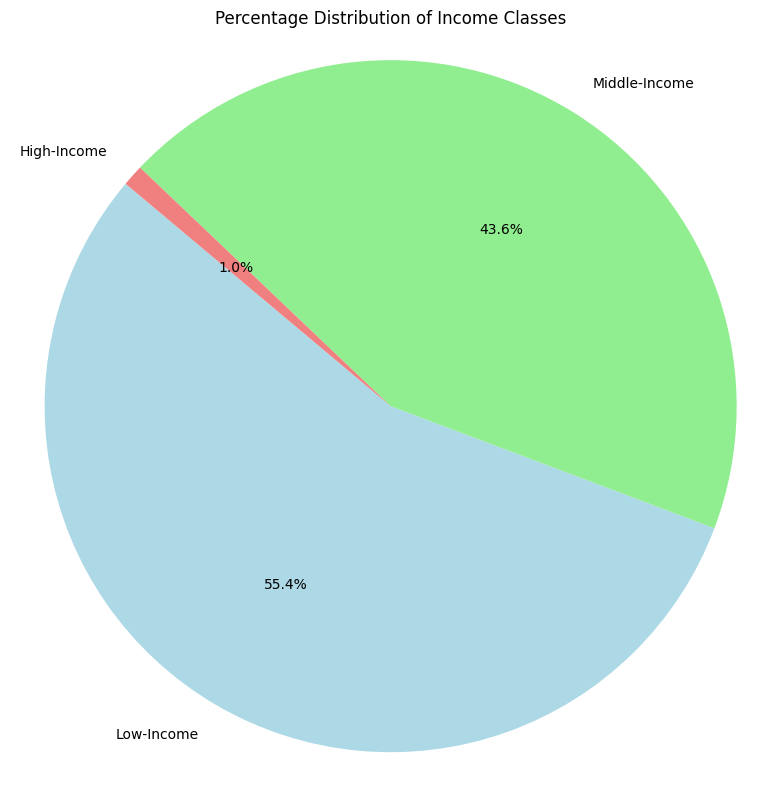

<Figure size 640x480 with 0 Axes>

In [33]:
labels = incomelevel_percentage.index

sizes = incomelevel_percentage.values

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Percentage Distribution of Income Classes')

plt.axis('equal')
plt.tight_layout()
plt.show()
plt.savefig('incomelevel_pie_chart.png')

From the summary statistics above, it can be observed that the largest income level among supermarket customers is Low-Income, constituting 55.14%, followed by Middle-Income level at 43.64%. Meanwhile, customers with high-income have the smallest representation, accounting for only 1.21%. Therefore, the analysis can be focused on customers with Low-Income and Middle-Income classifications. Consequently, customers classified as high-income can be disregarded to ensure a more focused analysis.

## Analysis based on Age

Age classification is divided into 3 categories:
- 20-40 (Millennials)
- 40-60 (Gen X)
- above 60 (Baby Boomers)

Source: 
https://www.dailymail.co.uk/femail/article-8109077/Which-generation-fall-into.html

To facilitate analysis, a column named "Age_Range" is created based on the above classification.

In [34]:
df['Age'].describe()

count    2205.000000
mean       55.095692
std        11.705801
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: Age, dtype: float64

In [35]:
age_bins1 = [20, 40, 60, float('inf')]
age_labels1 = ['Millennials', 'Gen X', 'Baby Boomers']

df['Age_Range'] = pd.cut(df['Age'], bins=age_bins1, labels=age_labels1)


Afterward, we can examine the data distribution based on the "Age_Range."

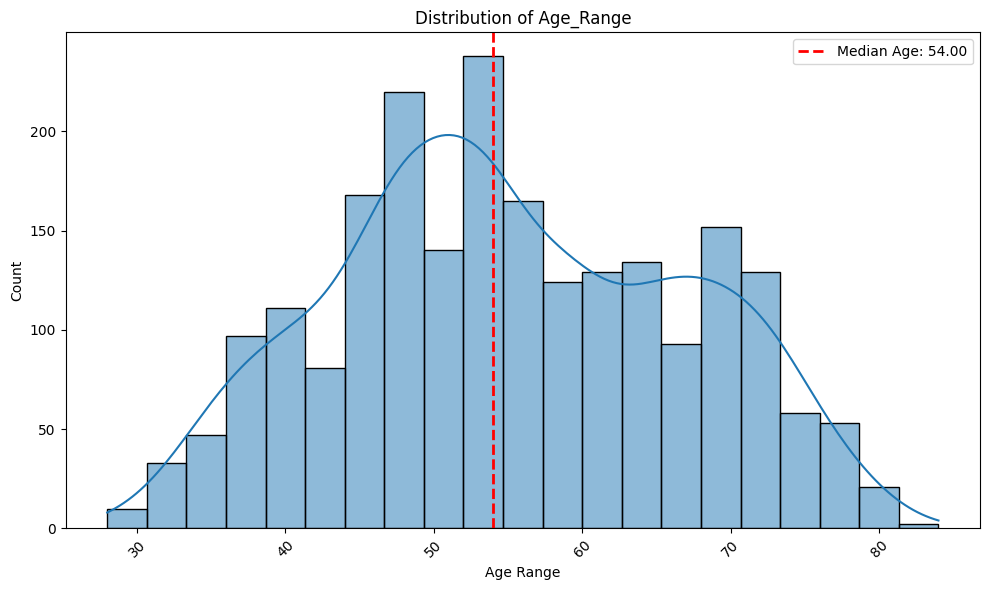

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Age'], kde=True)
plt.title('Distribution of Age_Range')
plt.xlabel('Age Range')
plt.ylabel('Count')

median_age = df['Age'].median()
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age:.2f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

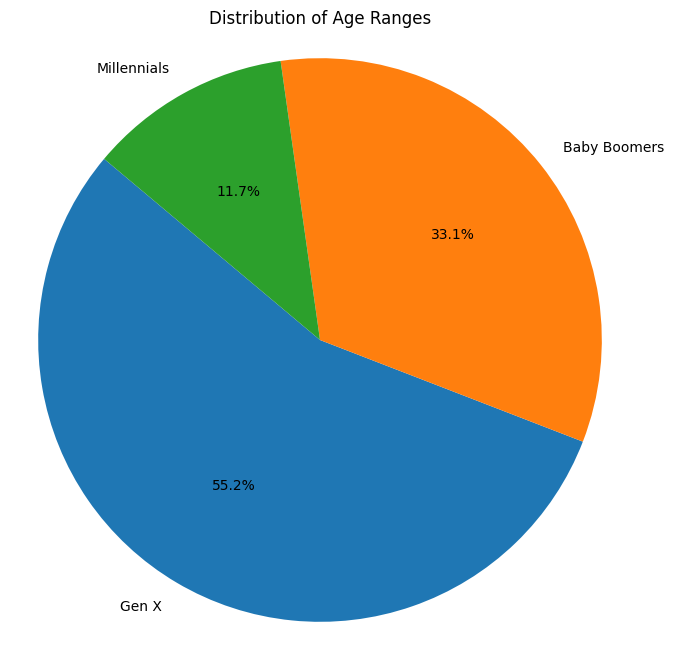

<Figure size 640x480 with 0 Axes>

In [37]:
age_range_counts = df['Age_Range'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_range_counts, labels=age_range_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Ranges')
plt.axis('equal')
plt.show()
plt.savefig('agerange_pie_chart.png')

From the distribution of age data, it can be observed that the age distribution among customers mostly falls within the Gen X and Baby Boomers age ranges. Therefore, Millennials can be disregarded in this analysis to focus more on determining the demographics of the customers.

## Result of Customer Demographic Analysis

From the above analysis, it has been observed that customers with High & Mid-Education levels, Low & Mid-Income levels, and belonging to Gen X & Baby Boomers age groups dominate the customer base of Supermarket X.

Let's examine the data on the amount of spending on products by customers with the demographics mentioned above.

In [38]:
filtered_df = df[
    ((df['Education'] == 'Mid Education') | (df['Education'] == 'High Education')) &
    ((df['income_class'] == 'Low-Income') | (df['income_class'] == 'Middle-Income')) &
    ((df['Age_Range'] == 'Gen X') | (df['Age_Range'] == 'Baby Boomers'))
]

spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

spending_df = filtered_df[spending_columns]


In [39]:
percentage_filtered_demography = len(filtered_df)/len(df)
percentage_filtered_demography

0.8616780045351474

The data that we will focus on for analysis, based on the specified demographics, constitutes 84.5% of the total dataset.

Total Spending on Products in previous 2 years (USD):
MntWines            601689
MntFruits            49595
MntMeatProducts     309338
MntFishProducts      71430
MntSweetProducts     50268
MntGoldProds         84243
dtype: int64


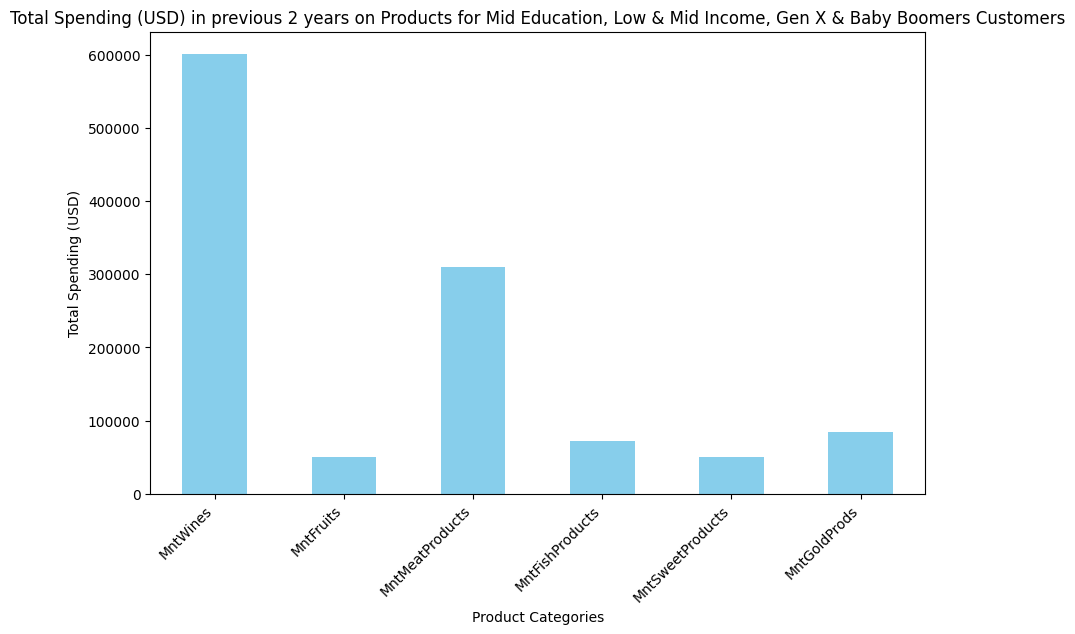

In [40]:
total_spending = spending_df.sum()

print("Total Spending on Products in previous 2 years (USD):")
print(total_spending)

plt.figure(figsize=(10, 6))
total_spending.plot(kind='bar', color='skyblue')
plt.title('Total Spending (USD) in previous 2 years on Products for Mid Education, Low & Mid Income, Gen X & Baby Boomers Customers')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

From the above visualization, it can be observed that customers tend to spend the most on the following product categories in descending order: Wines, Fruits, Meat, Fish, Sweets, and Golds.

However, the high spending by customers on products does not guarantee that the number of products sold is proportionate, as the average prices for each product category may differ. Therefore, an analysis is conducted on the quantity of products sold at Supermarket X.

To facilitate the analysis, the assumption is made that the prices of each product sold at Supermarket X are as follows, adjusted based on available sources:

Assumptions:
- Wines Price: $15 [average US wine price](https://home.binwise.com/blog/how-to-price-wine-bottles#:~:text=The%20average%20price%20of%20popular,is%20between%20%2410%20and%20%2415.)
- Fruit Price: $2.6 [average US fruit price](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/)
- Meat Products Price: $10.5 [average US meat price](https://www.bls.gov/regions/mid-atlantic/data/averageretailfoodandenergyprices_usandmidwest_table.htm)
- Fish Products Price: $9.65 [average US fish price](https://www.nationalfisherman.com/us-seafood-sales-plunge-as-inflation-continues-to-bite)
- Sweet Products Price: $2.5 [average US sweet products price](https://www.bls.gov/regions/mid-atlantic/data/averageretailfoodandenergyprices_usandmidwest_table.htm)
- Gold Products Price: $63.5 [average US gold products price](https://www.chards.co.uk/gold-price/daily-gold-price-per-gram-us-dollars)

Products sold estimation:
MntWines            40112.600000
MntFruits           19075.000000
MntMeatProducts     29460.761905
MntFishProducts      7402.072539
MntSweetProducts    20107.200000
MntGoldProds         1326.661417
dtype: float64


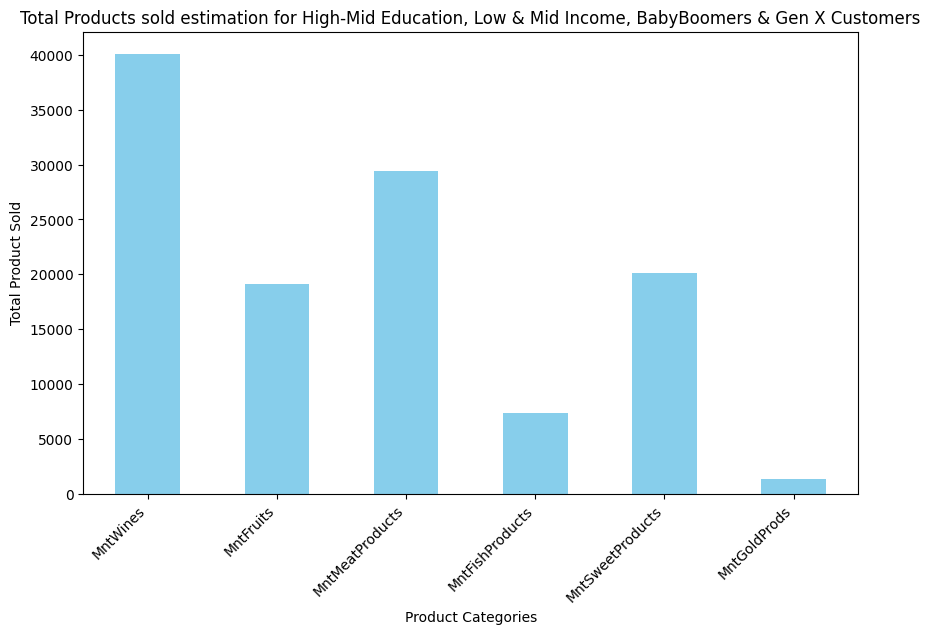

In [41]:
average_prices = {'MntWines': 15, 'MntFruits': 2.6, 'MntMeatProducts': 10.5,
                  'MntFishProducts': 9.65, 'MntSweetProducts': 2.5, 'MntGoldProds': 63.5}

Products_sold_by_price = total_spending / pd.Series(average_prices)

print("Products sold estimation:")
print(Products_sold_by_price)

plt.figure(figsize=(10, 6))
Products_sold_by_price.plot(kind='bar', color='skyblue')
plt.title('Total Products sold estimation for High-Mid Education, Low & Mid Income, BabyBoomers & Gen X Customers')
plt.xlabel('Product Categories')
plt.ylabel('Total Product Sold')
plt.xticks(rotation=45, ha='right')
plt.show()



From the above visualization, it can be seen that the best-selling products for the analyzed demographic are ranked as follows:
1. Wines
2. Meat
3. Sweets
4. Fish
5. Fruits
6. Gold

To conduct a more in-depth analysis of the impact of marketing programs such as campaigns, promotions, and selling channels at Supermarket X, further analysis of the specified customer demographics will be performed in the next steps.

## Campaign Analysis

To assess the performance of campaigns conducted for customers, let's analyze all the campaigns carried out within the previously specified demographics.

To facilitate the analysis and avoid confusion, the `filtered_df` (data containing the demographics of customers to be analyzed) is changed back to `df`.

In [42]:
df = filtered_df

Let's take a look at numbers of customers who accepted the campaigns launched by Supermarket X.

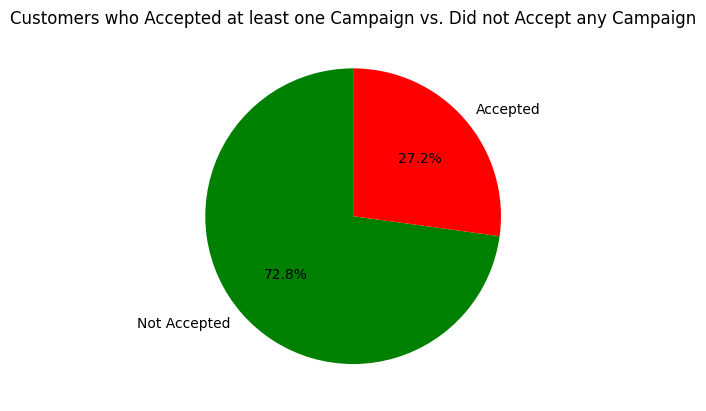

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataframe is named df
# Extract relevant columns
campaign_columns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6']

# Create a new column 'Accepted_At_Least_One_Campaign' indicating if the customer accepted at least one campaign
df['Accepted_At_Least_One_Campaign'] = (df[campaign_columns].sum(axis=1) > 0).replace({True: 'Accepted', False: 'Not Accepted'})

# Count the number of customers who accepted at least one campaign vs. those who did not
campaign_counts = df['Accepted_At_Least_One_Campaign'].value_counts()

# Plot the pie chart with percentage labels
fig, ax = plt.subplots()
ax.pie(campaign_counts, labels=campaign_counts.index, autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
ax.set_title('Customers who Accepted at least one Campaign vs. Did not Accept any Campaign')

# Display the plot
plt.show()


Let's examine the percentage of campaigns accepted by customers, leading to their purchases at Supermarket X.

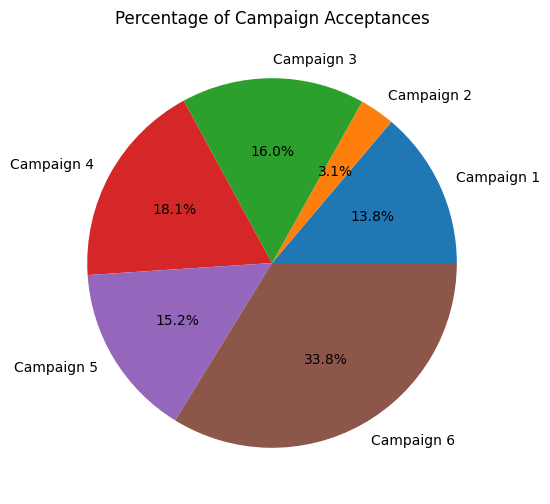

In [44]:
campaign_columns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6']

campaign_percentages = df[campaign_columns].mean() * 100

plt.figure(figsize=(10, 6))
ax = campaign_percentages.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Campaign Acceptances')
plt.xticks(rotation=45, ha='right')
plt.show()


From the above visualization, it can be observed that Campaign 6 has the highest overall acceptance rate, with approximately 15% of customers accepting the campaign.

Certainly, to gain deeper insights, we need to analyze the specific impact of each campaign on the percentage increase in spending amounts for each product at Supermarket X.

Sorted DataFrame for Campaign 6:
             Product    Campaign  PercentageIncrease
17   MntMeatProducts  Campaign 6           24.752859
5           MntWines  Campaign 6           22.876436
29  MntSweetProducts  Campaign 6           20.149996
35      MntGoldProds  Campaign 6           19.872274
11         MntFruits  Campaign 6           19.745942
23   MntFishProducts  Campaign 6           19.470811


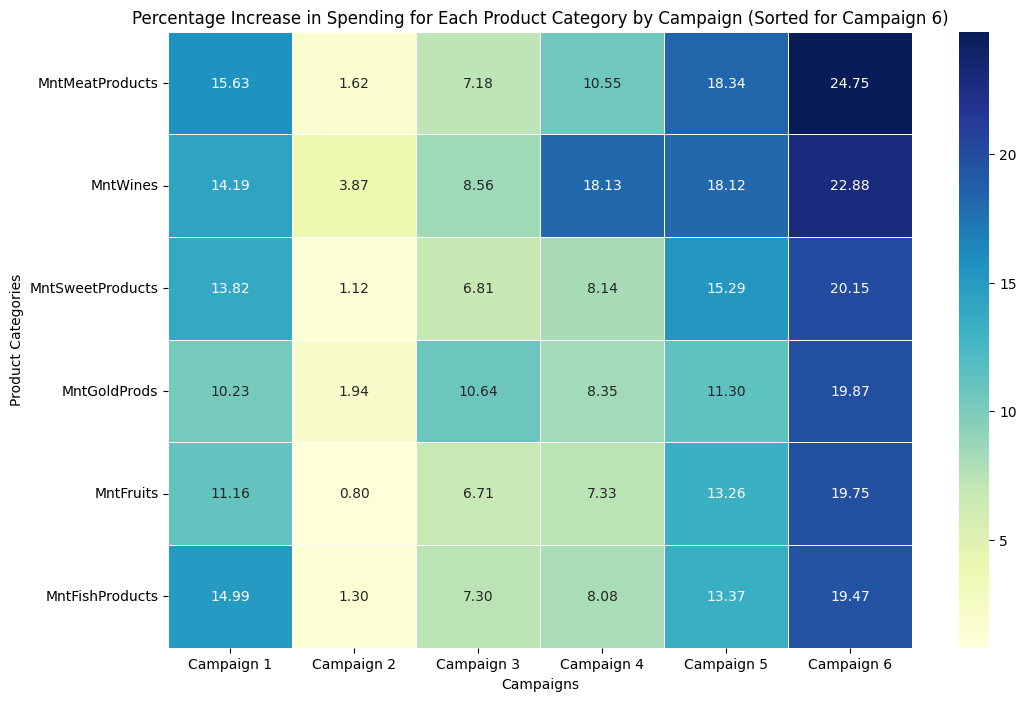

In [45]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
campaigns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6']

results = []

for product in product_columns:
    for campaign in campaigns:
        not_accepted_df = df[df[campaign] == 0]
        accepted_df = df[df[campaign] == 1]
        total_spending_not_accepted = not_accepted_df[product].sum()
        total_spending_accepted = accepted_df[product].sum()
        total_spending = df[product].sum()

        percentage_increase = ((df[product].sum() - total_spending_not_accepted) / df[product].sum()) * 100

        results.append({
            'Product': product,
            'Campaign': campaign,
            'PercentageIncrease': percentage_increase
        })

percentage_increase_df = pd.DataFrame(results)

heatmap_data = percentage_increase_df.pivot(index='Product', columns='Campaign', values='PercentageIncrease')

sorted_df = percentage_increase_df[percentage_increase_df['Campaign'] == 'Campaign 6'].sort_values(by='PercentageIncrease', ascending=False)

print("Sorted DataFrame for Campaign 6:")
print(sorted_df)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.loc[sorted_df['Product']], annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Percentage Increase in Spending for Each Product Category by Campaign (Sorted for Campaign 6)')
plt.xlabel('Campaigns')
plt.ylabel('Product Categories')
plt.show()



It can be seen from the above visualization that, overall, Campaign 6 has the most significant impact on the total spending amount for each product over the past two years.

In [46]:
DealsPurchases = df[['NumDealsPurchases','Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Campaign 6']]

DealsPurchases[(DealsPurchases['Campaign 1']==1) & (DealsPurchases['Campaign 2']==1)]

,NumDealsPurchases,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Campaign 6
413,1,1,1,0,1,1,1
542,1,1,1,0,1,1,1
558,3,1,1,0,1,0,1
784,3,1,1,0,1,0,1
804,1,1,1,0,1,1,1
970,1,1,1,0,1,1,1
1067,0,1,1,0,1,1,1
1287,1,1,1,1,0,1,1


In [47]:
Discount_Purchases = df['NumDealsPurchases'].sum()
df_count_rows = df.shape[0]

print(Discount_Purchases)

4603


## Selling Channels Analysis

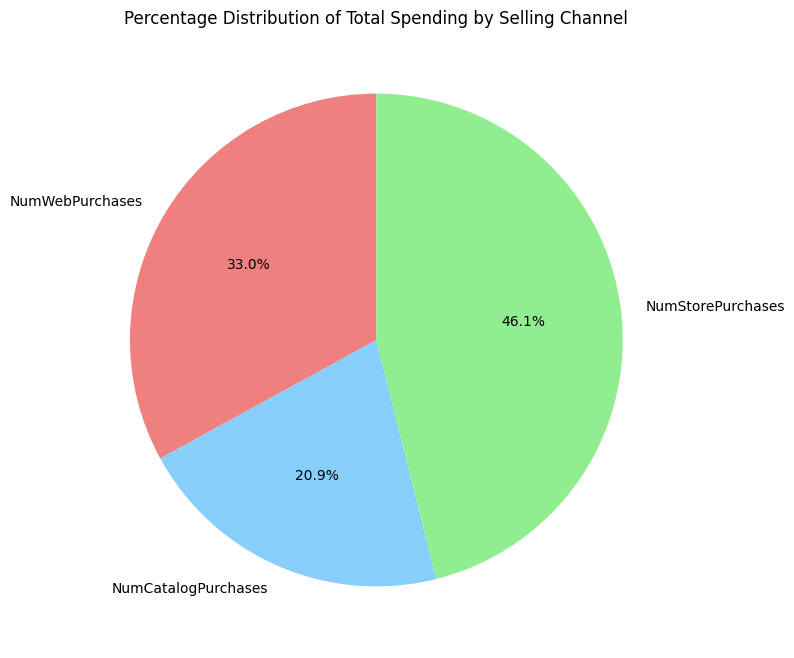

In [48]:
selling_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

sales_data = df[selling_channels]

total_spending_per_channel = sales_data.sum()

plt.figure(figsize=(8, 8))
plt.pie(total_spending_per_channel, labels=total_spending_per_channel.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Percentage Distribution of Total Spending by Selling Channel')
plt.show()


From the above visualization, it is evident that 46% of customers make purchases directly in-store. This is followed by customers who make purchases through the web, accounting for 33%. The remaining customers, with the lowest proportion at 21%, make purchases through the catalog.

## Selling Channels dan Campaign Analysis

In [49]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign 3', 'Campaign 4',
       'Campaign 5', 'Campaign 1', 'Campaign 2', 'Complain', 'Campaign 6',
       'Age', 'Enrollment_Age', 'Total_Children', 'Household_Size',
       'income_class', 'Age_Range', 'Accepted_At_Least_One_Campaign'],
      dtype='object')

Next, customers who make purchases due to the campaign (value of accepted campaign = 1) will be analyzed based on the available selling channels at Supermarket X.

<Figure size 1500x800 with 0 Axes>

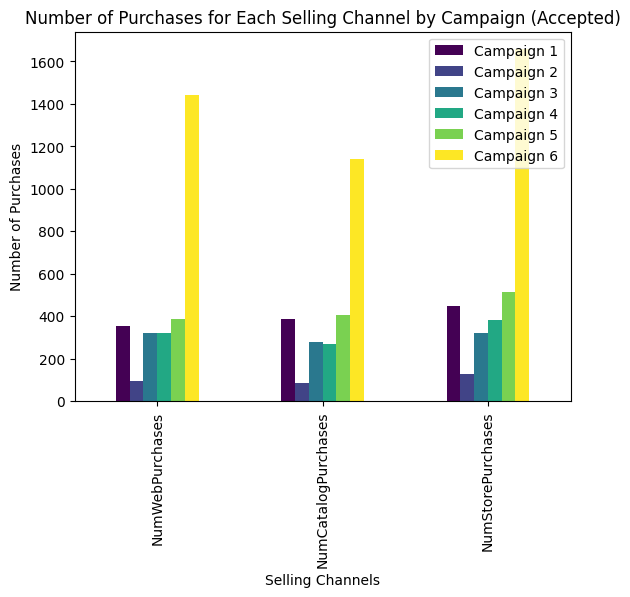

<Figure size 1500x800 with 0 Axes>

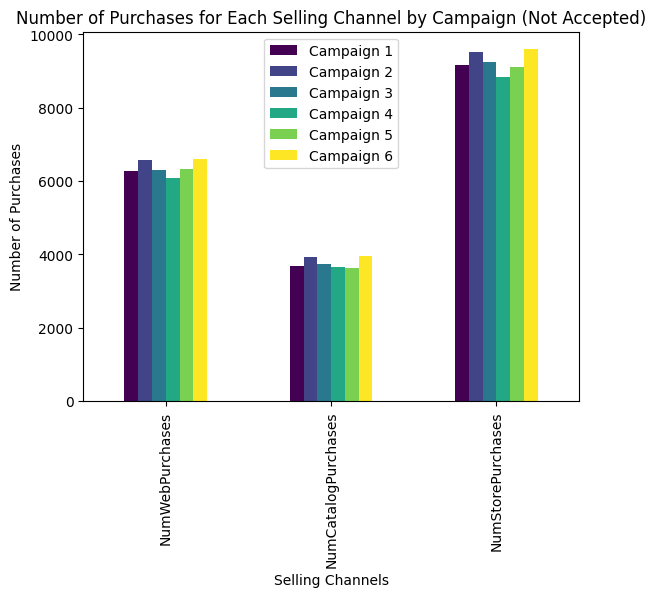

In [50]:
campaign_columns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6']
selling_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

result_accepted_df = pd.DataFrame(index=selling_channels, columns=campaign_columns)
result_not_accepted_df = pd.DataFrame(index=selling_channels, columns=campaign_columns)

for campaign in campaign_columns:
    campaign_data_accepted = df[(df[campaign] == 1) & (df['Campaign 6'] == 1)]
    campaign_data_not_accepted = df[(df[campaign] == 0) & (df['Campaign 6'] == 0)]

    result_accepted_df[campaign] = campaign_data_accepted[selling_channels].sum()
    result_not_accepted_df[campaign] = campaign_data_not_accepted[selling_channels].sum()

plt.figure(figsize=(15, 8))
result_accepted_df.plot(kind='bar', colormap='viridis')
plt.title('Number of Purchases for Each Selling Channel by Campaign (Accepted)')
plt.xlabel('Selling Channels')
plt.ylabel('Number of Purchases')
plt.show()

plt.figure(figsize=(15, 8))
result_not_accepted_df.plot(kind='bar', colormap='viridis')
plt.title('Number of Purchases for Each Selling Channel by Campaign (Not Accepted)')
plt.xlabel('Selling Channels')
plt.ylabel('Number of Purchases')
plt.show()


# Customers Enrollment Time Analysis

Before delving into the analysis of the supermarket customers' enrollment timelines, it is essential to examine the "Dt_Customer" column to gain a comprehensive understanding of the data. To begin, let's focus on the first month of available data which is July 2012.

In [51]:
date_july_2012 = df[(df['Dt_Customer'].dt.month == 7) & (df['Dt_Customer'].dt.year == 2012)]

date_july_2012

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign 3,Campaign 4,Campaign 5,Campaign 1,Campaign 2,Complain,Campaign 6,Age,Enrollment_Age,Total_Children,Household_Size,income_class,Age_Range,Accepted_At_Least_One_Campaign
1235,6653,High Education,Married,55158.0,1,1,2012-07-30,72,293,0,87,4,11,23,4,7,2,5,7,0,0,0,0,0,0,1,54,12,2,4,Low-Income,Gen X,Accepted
1342,6181,Mid Education,Together,52203.0,0,0,2012-07-31,36,488,21,238,56,108,28,1,8,7,11,6,0,0,0,0,0,0,0,74,12,0,2,Middle-Income,Baby Boomers,Not Accepted


As evident from the provided data, there are only two entries available for July 2012. Consequently, we can omit the information from this month and proceed with the analysis starting from August 2012 onwards.

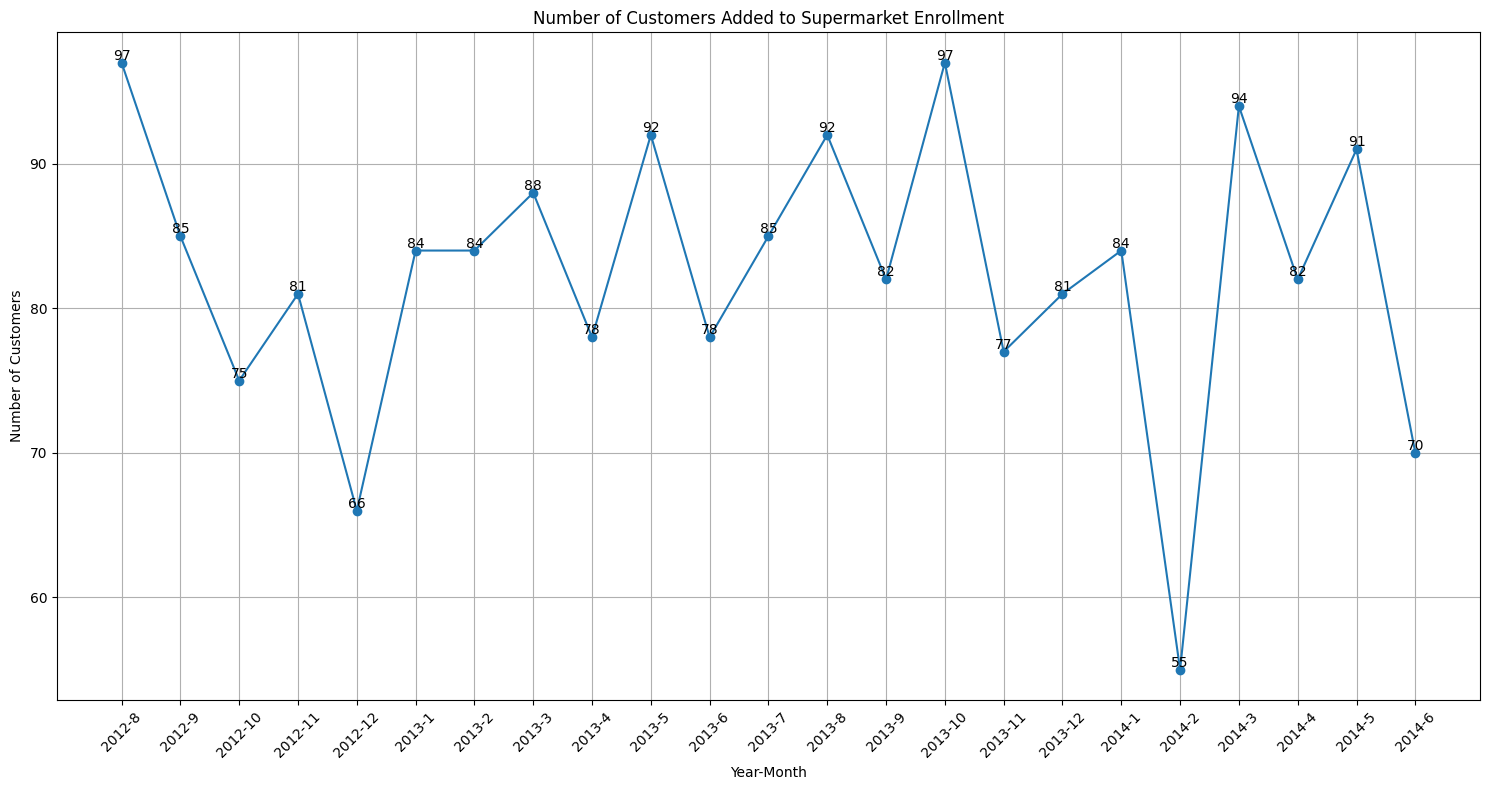

In [52]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month

df_september_onwards = df[df['Dt_Customer'] >= '2012-08-01']

monthly_customer_counts = df_september_onwards.groupby(['Year', 'Month']).size()

monthly_customer_counts.index = monthly_customer_counts.index.map(lambda x: f"{x[0]}-{x[1]}")

plt.figure(figsize=(15, 8))
plt.plot(monthly_customer_counts.index, monthly_customer_counts.values, marker='o', linestyle='-')
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Added to Supermarket Enrollment')

for i, value in enumerate(monthly_customer_counts.values):
    plt.text(monthly_customer_counts.index[i], value, str(value), ha='center', va='bottom')


plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the depicted line plot, we observe a robust initiation of supermarket customer enrollments, with a peak of 97 customers in August 2012. However, there was a notable decline in customer additions in December 2012, reaching a low of 66 customers. Subsequently, from January 2013 to September 2013, the monthly additions fluctuated within the range of 92 to 72 customers, experiencing a resurgence in October 2013. In February 2014, the customer additions reached a nadir at 55, swiftly rebounding to 94 in March 2014. The figures then decreased again to 70 customers in June 2014.

# Customers Last Purchase Analysis

In [53]:
df['Recency'].describe()

count    1900.000000
mean       48.964211
std        28.932104
min         0.000000
25%        24.000000
50%        49.500000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

Based on the "recency" or "days since the customer's last purchase" column, we can classify customers into three categories: frequent shoppers, occasional shoppers, and lapsed shoppers. Based on the provided data description, we can classify as follows:

- Frequent Shoppers: 0-33 days
- Occasional Shoppers: 33-66 days
- Lapsed Shoppers: Above 66 days

In [54]:
df['Shopper_Type'] = pd.cut(df['Recency'], bins=[0, 7, 30, float('inf')], labels=['Weekly Shopper', 'Monthly Shopper', 'More than one month Shopper'])


After categorizing the shopper type according to its Recency, the shopper types data could be plotted using pie chart.

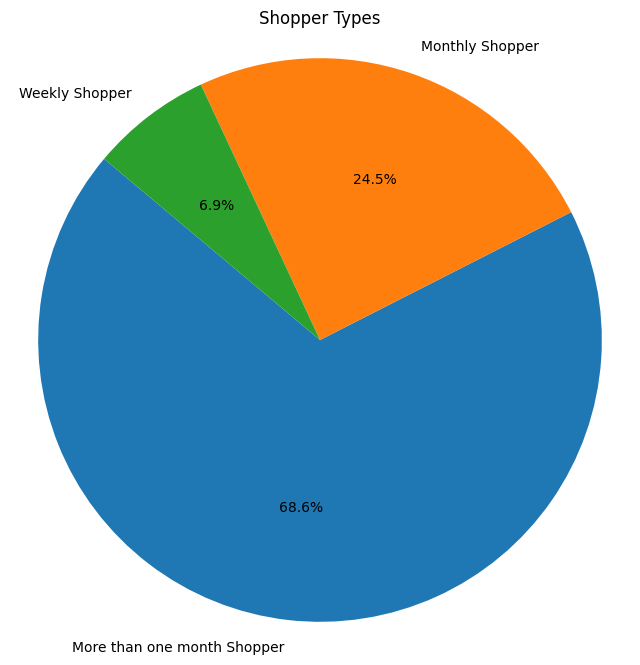

<Figure size 640x480 with 0 Axes>

In [55]:
shopper_type_counts = df['Shopper_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(shopper_type_counts, labels=shopper_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Shopper Types')
plt.axis('equal')
plt.show()
plt.savefig('shopper_frequency.png')

From the recency data, it can be seen that 68.5% of customers made their last purchase over a month ago. Customers with a last purchase between 7-30 days ago account for 24.3%, and for those with a last purchase within the last 7 days, it's 7.2%. Therefore, an effective campaign targeted at the right customer segments is necessary to encourage customers to choose this supermarket as their preferred shopping destination.

# Customers Complain Analysis

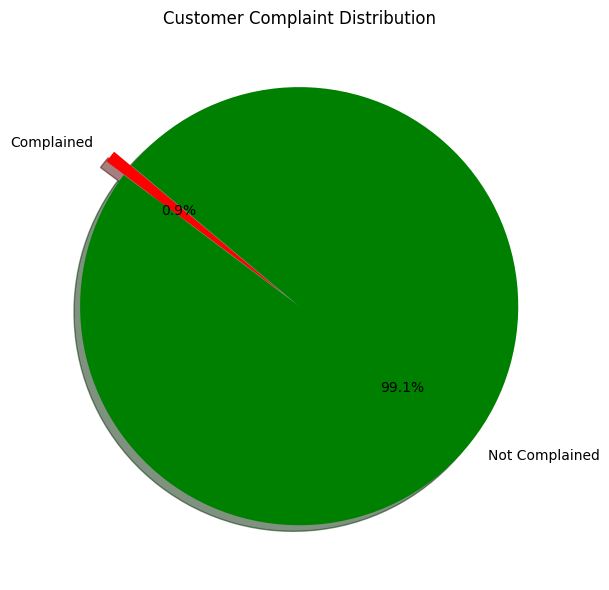

<Figure size 640x480 with 0 Axes>

In [56]:
complained_customers = df[df['Complain'] == 1]

not_complained_customers = df[df['Complain'] == 0]

complaint_counts = len(complained_customers)
no_complaint_counts = len(not_complained_customers)

labels = ['Complained', 'Not Complained']
sizes = [complaint_counts, no_complaint_counts]
colors = ['red', 'green']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Complaint Distribution')

plt.tight_layout()
plt.show()
plt.savefig('customer_complaint.png')

From the above pie chart, it can be observed that only 0.9% of customers have lodged a complaint. This is relatively low, indicating that a very small percentage of customers have expressed dissatisfaction with the supermarket. Therefore, based on the available customer data, the supermarket's service can be considered good.

In [57]:
ds = df[['Recency', 'Complain']]
ds.corr()

,Recency,Complain
Recency,1.000000,0.014997
Complain,0.014997,1.000000


The timing of the last purchase by customers does not seem to be significantly influenced by whether they have made a complaint or not. It indicates that the complaint status does not play a dominant role in determining when customers make their last purchases. Other factors might be more influential in shaping customer purchasing behavior.

## Converting df to CSV file


In [58]:
df.to_csv('C:\Kuliah\Purwadhika Data Science\Module 2 Data Analysis\Capstone Project Module 2\Supermarket Customers Cleaned.csv', index=False)

# Conclusion and Recommendation

Based on the analysis conducted, here are some recommendations:

1. **Dominant Demographics:**
   - Focus marketing and sales strategies on customers with Mid-Education, Low-Income & Mid-Income, and Gen X, as they dominate the supermarket market share.

2. **Flagship Products:**
   - Maintain the quality and diversify the types of Wine and Meat, as customers with the identified characteristics tend to spend significantly on these products.

3. **Campaign Effectiveness:**
   - Analysis indicates that the latest campaign is the most effective. Use the marketing content from the latest campaign as a basis for the next campaigns. Focus on promoting products other than Wine and Meat to boost sales of other products.

4. **Online Sales:**
   - The web visit rate is quite high. Encourage online purchases through promotions and incentives as an opportunity to gain a competitive edge. However, the transition to online sales needs to be carefully considered.

5. **Customer Registration:**
   - Strive to increase the number of customers registering with the supermarket, especially after the observed decline in the last year. This will help update and improve the accuracy of customer data.

6. **Subscription Service:**
   - Consider introducing a subscription service for customers, given that the average purchase cycle is more than one month. This can help reduce the percentage of stocked items and expedite sales, especially for perishable products like meat.

7. **Customer Service:**
   - Maintain a high-quality customer service, considering the low complaint rate (0.9%) over the past two years. This will contribute to a positive image and enhance customer satisfaction.